#**Ejemplo de correo spam o no spam**

##**Ejemplo simulado**

Exactitud: 1.0
El correo electrónico es SPAM.


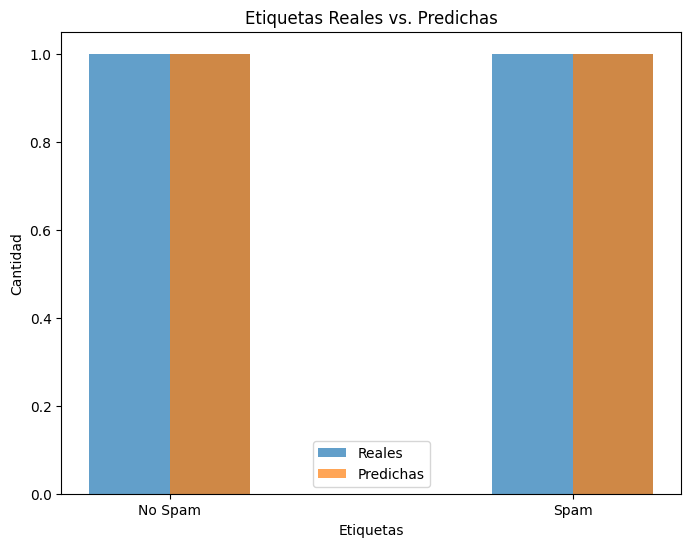

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Datos ficticios de detección de spam (0: no es spam, 1: es spam)
correos = [
    "Oferta especial: gane dinero rápido y fácil",
    "Reunión de la junta directiva a las 10 a.m.",
    "¡Felicidades! Ha ganado un premio en efectivo",
    "Recordatorio: su factura de electricidad vence pronto",
    "Confirmación de pedido de la tienda en línea",
    "Gane un viaje gratis al Caribe",
]

etiquetas = [1, 0, 1, 0, 0, 1]

# Dividir los datos en conjuntos de entrenamiento y prueba
correos_train, correos_test, etiquetas_train, etiquetas_test = train_test_split(correos, etiquetas, test_size=0.2, random_state=42)

# Convertir texto a características numéricas utilizando TF-IDF
vectorizador = TfidfVectorizer()
X_train = vectorizador.fit_transform(correos_train)
X_test = vectorizador.transform(correos_test)

# Crear un modelo de Regresión Logística
modelo_logistico = LogisticRegression()

# Entrenar el modelo
modelo_logistico.fit(X_train, etiquetas_train)

# Realizar predicciones en el conjunto de prueba
etiquetas_pred = modelo_logistico.predict(X_test)

# Calcular la precisión del modelo
exactitud = accuracy_score(etiquetas_test, etiquetas_pred)
print("Exactitud:", exactitud)

# Crear un gráfico de barras para visualizar las predicciones
etiquetas_reales = etiquetas_test
etiquetas_predichas = etiquetas_pred

etiquetas = ['No Spam', 'Spam']
x = range(len(etiquetas))

plt.figure(figsize=(8, 6))
plt.bar(x, np.bincount(etiquetas_reales), width=0.4, label='Reales', align='center', alpha=0.7)
plt.bar(x, np.bincount(etiquetas_predichas), width=0.2, label='Predichas', align='edge', alpha=0.7)

plt.xlabel('Etiquetas')
plt.ylabel('Cantidad')
plt.title('Etiquetas Reales vs. Predichas')
plt.xticks(x, etiquetas)
plt.legend()

# Nuevo correo electrónico para predecir (cambia esto por el correo que desees)
nuevo_correo = ["¡Felicidades! Eres el ganador de un premio en efectivo."]

# Convertir el nuevo correo electrónico a características numéricas utilizando el mismo vectorizador TF-IDF
nuevo_correo_transformado = vectorizador.transform(nuevo_correo)

# Realizar la predicción utilizando el modelo
prediccion = modelo_logistico.predict(nuevo_correo_transformado)

# Interpretar el resultado de la predicción
if prediccion[0] == 1:
    print("El correo electrónico es SPAM.")
else:
    print("El correo electrónico NO es SPAM.")

plt.show()


## **Ejemplo datos de un conjunto**

### **importacion de librerias**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

### **Traemos el dataframe**

In [3]:
# Importamos de nuestros archivos el data set, luego mostramos (Ver video de como importar)
df = pd.read_csv('/content/spam.csv')
df

FileNotFoundError: ignored

### **Mostramos la informacion de los datos que nos puede ayudar para saber con que tipo de variables contamos y la cantidad de columnas y filas del dataframe**

In [ ]:
df.info()

### **Mostramos los primeros 10 datos**

In [ ]:
df.head(10)

### **Limpieza verificamos valores nulos**
### **Si tiene valores nulos eliminar o modificar**

In [ ]:
# Verificar los valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

# Imprimir los valores nulos por columna
print(valores_nulos)

### **Preprocesamos los datos para poder adecuar las clasificaciones**

In [ ]:
# Preprocesamiento de datos, mostramos los primero 10 datos
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})  # Convertir 'ham' a 0 y 'spam' a 1
df.head(10)

### **Asignamos los datos con los que van a trabajar nuestra variable dependiente (Y) e independiente (X)**

In [ ]:
X = df['Message']  # Mensajes
y = df['Category']  # Etiquetas (0 para 'ham' y 1 para 'spam')

### **Dividimos el dataframe en conjunto de entrenamiento y prueba o testeo**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Trabajamos con la libreria de "sklearn.feature_extraction.text" para poder utilizar el texto como escuadra numerica donde "TfidfVectorizer" convierte la secuencia de palabras en vectores de numeros**

In [ ]:
# Crear un vectorizador TF-IDF para convertir el texto en características numéricas
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar el número máximo de características

#modificiamos los valores de entrenamiento y testeo por la conversion vectorizada numerica del texto
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### **Entrenamos nuestro modelo de regresion logistica y realizamos la prediccion**

In [ ]:
# Entrenar un modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression_model.predict(X_test_tfidf)


### **Calculamos la probabilidad de predicción para el conjunto de prueba**

In [ ]:
y_prob = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]
print(y_prob)

### **Evaluamos el modelo con las metricas para saber si la aplicacion es la mas acertadada y mostramos resultados de metricas de evaluacion**

In [ ]:
# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular otras métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir otras métricas
print(f'Precisión: {precision:.2f}')
print(f'Exhaustividad: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')
print(f'Exactitud: {accuracy:.2f}')
print(f'Área bajo la curva ROC: {roc_auc:.2f}')

### **Calculamos la curva ROC y el área bajo la curva (AUC)**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


### **Gráficamos de la curva ROC**

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



###**Generamos el caso donde requerimos una prediccion**

In [ ]:
# Ejemplo de uso directo para realizar una predicción
mensaje_nuevo = "Congratulations! You have won a cash prize of $1000. Click the link to claim your prize."
mensaje_nuevo_tfidf = tfidf_vectorizer.transform([mensaje_nuevo])
probabilidad_spam = logistic_regression_model.predict_proba(mensaje_nuevo_tfidf)[:, 1]

if probabilidad_spam >= 0.5:
    prediccion = "spam"
else:
    prediccion = "ham"

print(f"Predicción: {prediccion}")




### **Ejemplo completo**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

# Cargar los datos
data = pd.read_csv('spam.csv')

# Preprocesamiento de datos
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

X = data['Message']
y = data['Category']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un vectorizador TF-IDF para convertir el texto en características numéricas
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenar un modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Calcular las probabilidades de predicción
y_prob = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]


# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Imprimir otras métricas
print(f'Precisión: {precision:.2f}')
print(f'Exhaustividad: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')
print(f'Exactitud: {accuracy:.2f}')
print(f'Área bajo la curva ROC: {roc_auc:.2f}')

# Ejemplo de uso directo para realizar una predicción
mensaje_nuevo = "Congratulations! You have won a cash prize of $1000. Click the link to claim your prize."
mensaje_nuevo_tfidf = tfidf_vectorizer.transform([mensaje_nuevo])
probabilidad_spam = logistic_regression_model.predict_proba(mensaje_nuevo_tfidf)[:, 1]

if probabilidad_spam >= 0.5:
    prediccion = "spam"
else:
    prediccion = "ham"

print(f"Predicción: {prediccion}")



NameError: name 'roc_auc' is not defined

<Figure size 800x600 with 0 Axes>

### **CONCLUCIONES**

**Modelo de Clasificación Efectivo:** El modelo de regresión logística entrenado parece ser efectivo para la clasificación de mensajes de texto como "spam" o "ham". Esto se basa en las métricas de evaluación, como precisión, exhaustividad y puntuación F1.

**Detección de Spam Basada en TF-IDF:** El uso de la vectorización TF-IDF para convertir el texto de los mensajes en características numéricas es una técnica efectiva para este problema de detección de spam. Permite al modelo aprender patrones de palabras clave que son comunes en mensajes de spam.

**Evaluación Integral:** El código incluye una evaluación integral del modelo, que va más allá de la precisión. La curva ROC y el área bajo la curva (AUC) proporcionan una visión detallada del rendimiento del modelo en diferentes umbrales de decisión.

**Ajuste de Hiperparámetros:** No se muestra en el código, pero sería beneficioso realizar ajustes de hiperparámetros y validación cruzada para optimizar el rendimiento del modelo.

**Interpretación de la Probabilidad:** La probabilidad de predicción se utiliza para determinar si un mensaje es "spam" o "ham". Esto permite cierto grado de flexibilidad al ajustar el umbral en función de los requisitos específicos de detección de spam.

**Visualización de Resultados:** El código incluye gráficos que facilitan la comprensión del rendimiento del modelo, como la Curva ROC.



En general, el código y el análisis proporcionados demuestran un enfoque sólido para la detección de spam en mensajes de texto utilizando un modelo de regresión logística y la vectorización TF-IDF. Sin embargo, para aplicaciones en el mundo real, sería importante continuar ajustando y evaluando el modelo en un conjunto de datos más amplio y diverso, así como implementar mecanismos de validación en tiempo real para la detección de spam en correos electrónicos o mensajes de usuarios.

#**Ejemplo un poco mas para pensar**


## **Ejemplo de deteccion de cancer tumor**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud: 0.9649122807017544
Precisión: 0.958904109589041
Recuperación: 0.9859154929577465
F1-Score: 0.9722222222222222


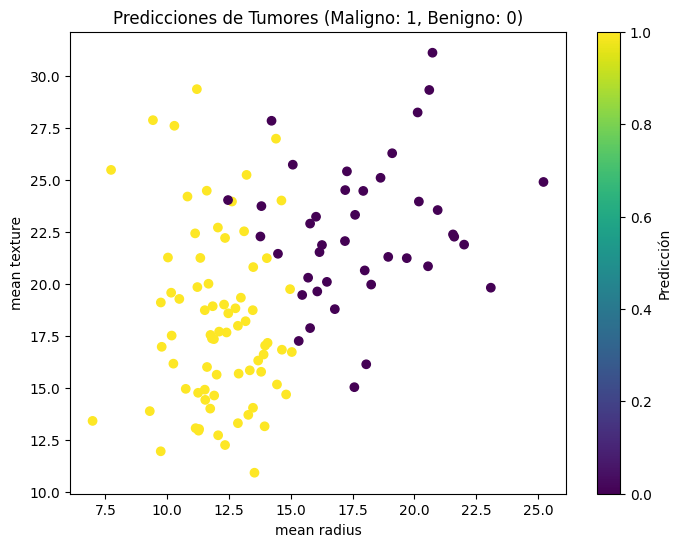

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un modelo de Regresión Logística
modelo_logistico = LogisticRegression()

# Entrenar el modelo
modelo_logistico.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = modelo_logistico.predict(X_test)

# Calcular métricas de evaluación
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recuperacion = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Imprimir las métricas de evaluación
print("Exactitud:", exactitud)
print("Precisión:", precision)
print("Recuperación:", recuperacion)
print("F1-Score:", f1)

# Crear un gráfico de dispersión para visualizar las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_pred, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Predicciones de Tumores (Maligno: 1, Benigno: 0)')
plt.colorbar(label='Predicción')
plt.show()


### **Inferencia en la prediccion**

Predicción para la nueva observación: Maligno


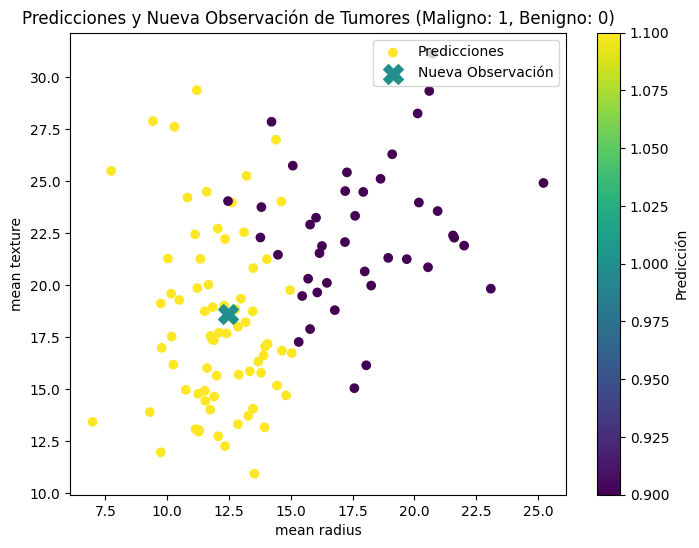

In [ ]:
# Crear un nuevo conjunto de datos para la predicción
nueva_observacion = X_test.iloc[0:1]  # Tomar una fila del conjunto de prueba como nueva observación

# Realizar la predicción en la nueva observación
prediccion = modelo_logistico.predict(nueva_observacion)

# Interpretar el resultado de la predicción
if prediccion[0] == 1:
    resultado = "Maligno"
else:
    resultado = "Benigno"

print("Predicción para la nueva observación:", resultado)

# Crear un gráfico de dispersión para visualizar las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_pred, cmap='viridis', label='Predicciones')
plt.scatter(nueva_observacion.iloc[:, 0], nueva_observacion.iloc[:, 1], c=prediccion, marker='X', cmap='viridis', s=200, label='Nueva Observación')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Predicciones y Nueva Observación de Tumores (Maligno: 1, Benigno: 0)')
plt.colorbar(label='Predicción')
plt.legend(loc='upper right')
plt.show()
